In [1]:
import pandas
from datetime import datetime
from pytz import utc
import matplotlib.pyplot as plt

In [2]:
data = pandas.read_csv("reviews (1).csv", parse_dates = ["Timestamp"])
data.head()

,Course Name,Timestamp,Rating,Comment
0,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 06:25:52+00:00,4.0,NaN
1,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:12:34+00:00,4.0,NaN
2,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:11:03+00:00,4.0,NaN
3,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:33:24+00:00,5.0,NaN
4,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:31:49+00:00,4.5,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   Course Name  45000 non-null  object             
 1   Timestamp    45000 non-null  datetime64[ns, UTC]
 2   Rating       45000 non-null  float64            
 3   Comment      6799 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(1), object(2)
memory usage: 1.4+ MB


In [4]:
data.describe()

,Rating
count,45000.000000
mean,4.442156
std,0.733265
min,0.500000
25%,4.000000
50%,4.500000
75%,5.000000
max,5.000000


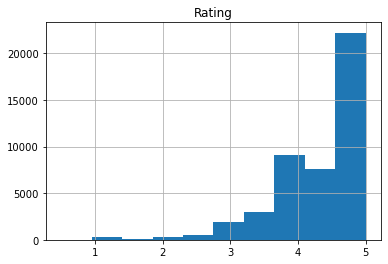

In [5]:
data.hist('Rating');

In [6]:
data['Day'] = data['Timestamp'].dt.date
day_average = data.groupby(['Day']).mean()
day_average.head()

,Rating
Day,
2018-01-01,4.532609
2018-01-02,4.122807
2018-01-03,4.360465
2018-01-04,4.531250
2018-01-05,4.423077


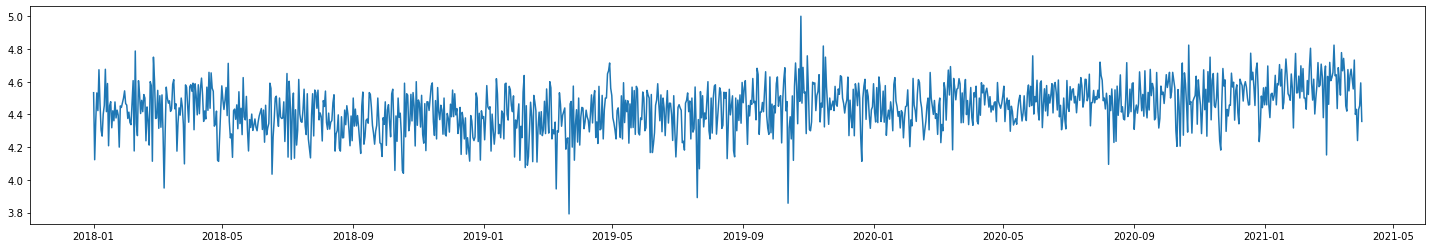

In [7]:
plt.figure(figsize = (25, 4))
plt.plot(day_average.index, day_average["Rating"]);

In [8]:
data['Week'] = data['Timestamp'].dt.strftime('%Y-%U')
week_average = data.groupby(['Week']).mean()
week_average.head()

,Rating
Week,
2018-00,4.434564
2018-01,4.424933
2018-02,4.417702
2018-03,4.401024
2018-04,4.468085


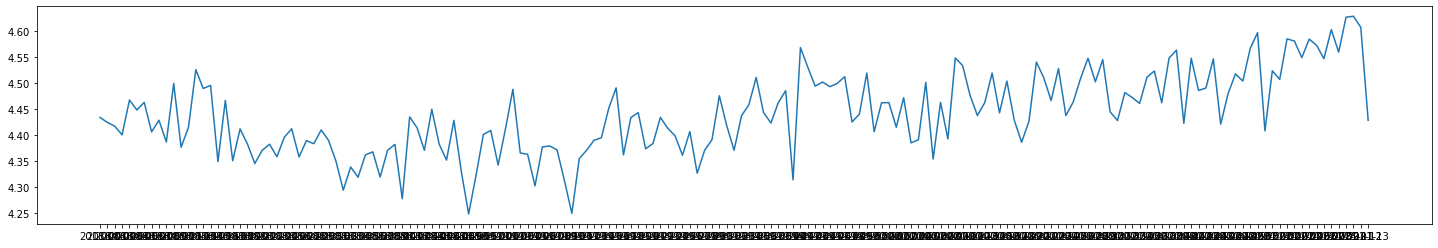

In [9]:
plt.figure(figsize = (25, 4))
plt.plot(week_average.index, week_average["Rating"]);

In [10]:
data['month'] = data['Timestamp'].dt.strftime('%Y-%m')
month_average_course = data.groupby(['month', 'Course Name']).mean().unstack()
month_average_course.head()

Rating  \
Course Name 100 Python Exercises I: Evaluate and Improve Your Skills   
month                                                                  
2018-01                                               4.353448         
2018-02                                               4.250000         
2018-03                                               4.500000         
2018-04                                               4.431034         
2018-05                                               4.358696         

                                                                       \
Course Name 100 Python Exercises II: Evaluate and Improve Your Skills   
month                                                                   
2018-01                                                    NaN          
2018-02                                                    NaN          
2018-03                                                    NaN          
2018-04                                                    NaN          
2018-05                                                    NaN          

                                         \
Course Name Data Processing with Python   
month                                     
2018-01                        4.500000   
2018-02                        4.205882   
2018-03                        4.281250   
2018-04                        4.468750   
2018-05                        4.176471   

                                                                  \
Course Name Interactive Data Visualization with Python and Bokeh   
month                                                              
2018-01                                               4.285714     
2018-02                                               4.157895     
2018-03                                               4.266667     
2018-04                                               4.428571     
2018-05                                               4.107143     

                                                                      \
Course Name Learn GIS in One Hour Python for Beginners with Examples   
month                                                                  
2018-01                  4.236842                           4.355422   
2018-02                  4.437500                           4.363095   
2018-03                  4.166667                           4.357143   
2018-04                  4.250000                           4.378947   
2018-05                  4.666667                           4.362654   

                                                                        \
Course Name The Complete Python Course: Build 10 Professional OOP Apps   
month                                                                    
2018-01                                                    NaN           
2018-02                                                    NaN           
2018-03                                                    NaN           
2018-04                                                    NaN           
2018-05                                                    NaN           

                                                                      
Course Name The Python Mega Course: Build 10 Real World Applications  
month                                                                 
2018-01                                               4.457368        
2018-02                                               4.481070        
2018-03                                               4.447037        
2018-04                                               4.507412        
2018-05                                               4.422085

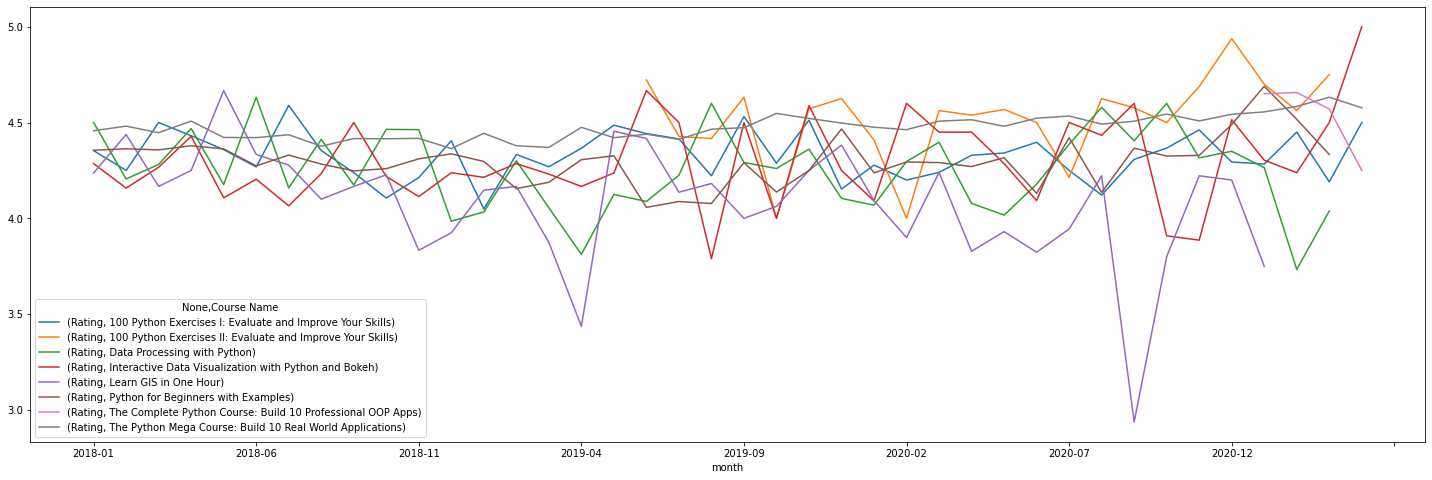

In [11]:
month_average_course.plot(figsize = (25, 8));

In [12]:
data['weekday'] = data['Timestamp'].dt.strftime('%A')
weekday_avg = data.groupby(["weekday"]).mean().sort_values("weekday")
weekday_avg

,Rating
weekday,
Friday,4.455207
Monday,4.449335
Saturday,4.440274
Sunday,4.439097
Thursday,4.437880
Tuesday,4.446240
Wednesday,4.427452


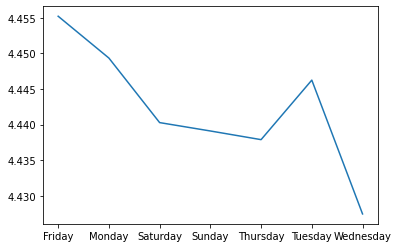

In [13]:
plt.plot(weekday_avg.index, weekday_avg["Rating"]);

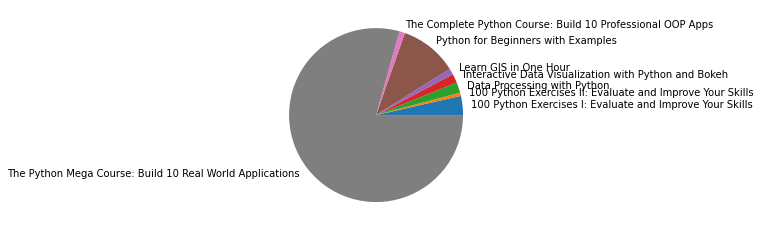

In [14]:
share = data.groupby(['Course Name'])['Rating'].count()
plt.pie(share, labels = share.index);